In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed, Conv1D, MaxPool1D, Flatten
import tensorflow as tf

tf.config.set_visible_devices([], 'GPU')

In [18]:
import pandas as pd
import numpy as np
import keras

df = pd.read_csv("./prices.txt", sep="\\s+", header=None, index_col=None)
df.index = np.arange(df.shape[0])
df.rename(columns=lambda c: int(c), inplace=True)

train_df = df.iloc[:500]


In [406]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

target = 2
n_steps = 50
n_features = 50
n_seq = 1

dataset = train_df.pct_change().dropna()

Xs = []
y = []
for instr in range(50):
    raw_seq = dataset[instr].values
    iX, iy = split_sequence(raw_seq, n_steps)
        
    if instr == target:
        y = iy

    Xs.append(iX)

X = np.dstack(Xs)
X = X.reshape((X.shape[0], n_steps, n_features))

# define model
model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=32, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
# model.add(TimeDistributed(MaxPool1D()))
# model.add(TimeDistributed(Flatten()))
model.add(LSTM(5, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(5, activation='relu', input_shape=(n_steps, n_features)))
# model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer="adam", loss=keras.losses.mean_squared_error)
model.fit(X, y, epochs=50, validation_split=0.1, batch_size=16)

Epoch 1/50


/opt/miniconda3/envs/dl12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7567e-04 - val_loss: 1.5471e-04
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7788e-04 - val_loss: 1.5468e-04
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7393e-04 - val_loss: 1.5975e-04
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7015e-04 - val_loss: 1.5467e-04
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5159e-04 - val_loss: 1.5498e-04
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7906e-04 - val_loss: 1.5739e-04
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7538e-04 - val_loss: 1.5542e-04
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8453e-04 - val_loss: 1.5476e-04
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7299e-04 - val_loss: 1.5556e-04
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7630e-04 - val_loss: 1.6251e-04
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7446e-04 - val_loss: 1.5577e

In [407]:
dataset = df.iloc[500:].pct_change().dropna()


Xs = []
y = []
for instr in range(50):
    raw_seq = dataset[instr].values
    iX, iy = split_sequence(raw_seq, n_steps)
        
    if instr == target:
        y = iy

    Xs.append(iX)

X = np.dstack(Xs)
X = X.reshape((X.shape[0], n_steps, n_features))
test_X = X
test_y = y

In [408]:

ypred = model.predict(test_X, verbose=0)
ypred = ypred.reshape(ypred.size)
mse = np.mean(np.power(ypred - test_y, 2))
mse

np.float64(0.00013752045512057528)

In [409]:
# baseline
np.mean(np.power(np.zeros_like(test_y) - test_y, 2))


np.float64(0.00013707152554120385)

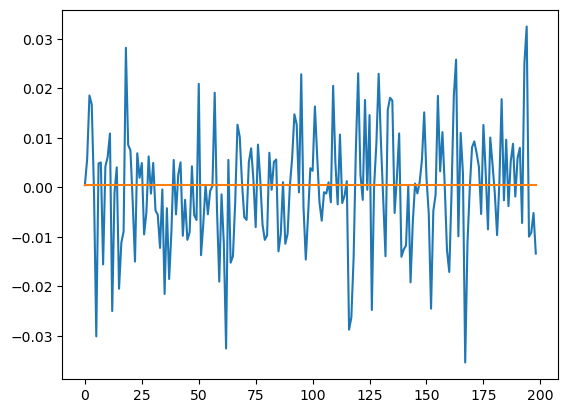

In [410]:
import matplotlib.pyplot as plt

# plt.scatter(ypred, test_y)
plt.plot(test_y)
plt.plot(ypred)

In [345]:
model.save('out.keras')